In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler # 최상의 성능을 위해 스케일 조정 필요 -> StandardScaler 클래스 사용하여 특성을 표준화
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

퍼셉트론 모델이 만든 붓꽃 데이터셋의 결정 경계

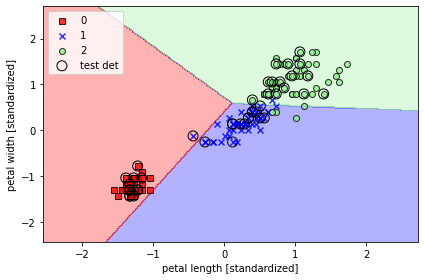

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # 마커와 컬러맵을 설정합니다
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정 경계를 그립니다
  x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl,1],
                alpha=0.8, c=colors[idx],
                marker=markers[idx], label=cl,
                edgecolors='black')
    
  # 테스트 샘플을 부각하여 그립니다
  if test_idx:
    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0], X_test[:, 1],
                facecolors='none', edgecolors='black', alpha=1.0,
                linewidth=1, marker='o',
                s=100, label='test det')  
    
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, 
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

사이킷런의 로지스틱 회귀 모델이 만든 결정 경계

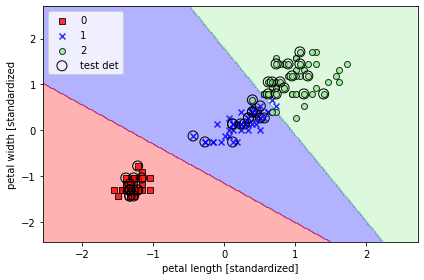

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

SVM 분류기가 학습한 붓꽃 데이터셋의 결정 경계

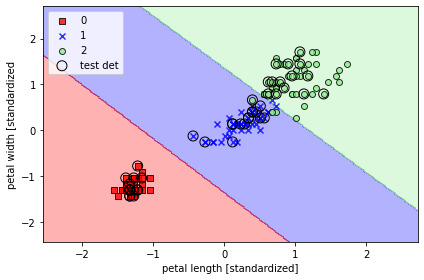

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

RBF 커널 SVM 모델이 학습한 붓꽃 데이터셋의 결정 경계

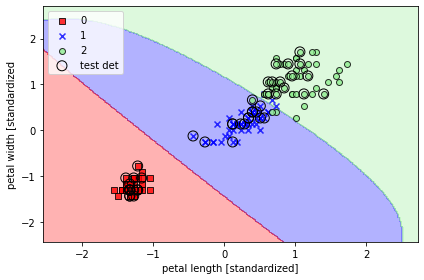

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0) # gamma 값을 높임, 0.2
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

감마 매개변수를 크게 한 RBF 커널 SVM의 결정 경계

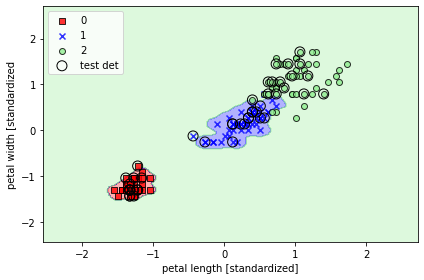

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0) # gamma 값을 더 높임, 100
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

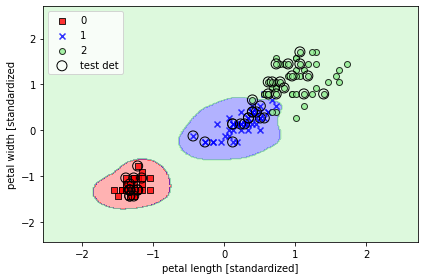

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=10.0, C=1.0) # gamma 값을 이전보다 낮춤, 10
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

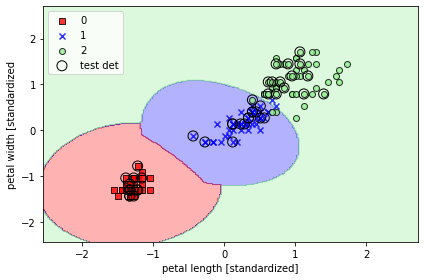

In [ ]:
svm = SVC(kernel='rbf', random_state=1, gamma=1.0, C=1.0) # gamma 값 : 1.0
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# WK05

# 의사 결정 트리

결정 트리가 학습한 붓꽃 데이터셋의 결정 경계

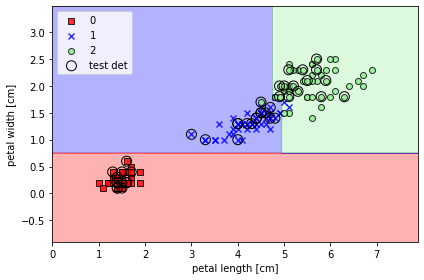

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini',
                              max_depth=4,
                              random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                      y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

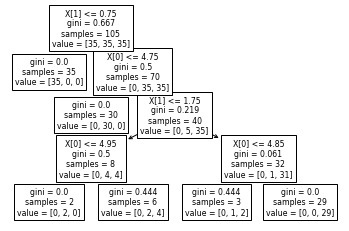

In [ ]:
# plot_tree() 함수로 그린 결정 트리
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

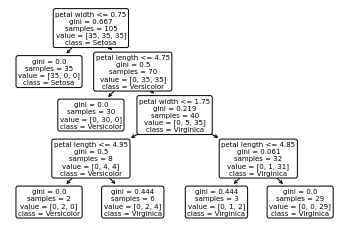

In [ ]:
# 붓꽃 데이터셋의 결정 트리
tree.plot_tree(tree_model,
               impurity=True,
               rounded=True,
               class_names=['Setosa',
                            'Versicolor',
                            'Virginica'],
               feature_names=['petal length',
                              'petal width'])
plt.show()

In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,
                           filled=True,
                           rounded=True,
                           class_names=['Setosa',
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length',
                                          'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

랜덤 포레스트가 학습한 붓꽃 데이터셋의 결정 경계

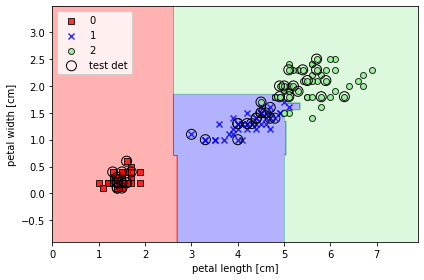

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# K-최근접 이웃: 게으른 학습 알고리즘

K-최근접 이웃 모델이 학습한 붓꽃 데이터셋의 결정 경계

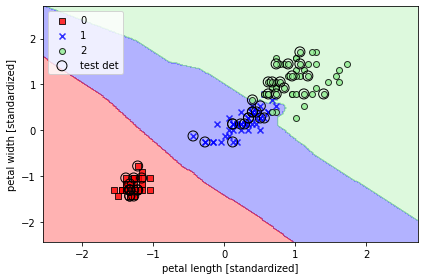

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, # 매개변수 p=2로 지정하면 유클리디안 거리, p=1로 지정하면 맨해튼 거리가 됨
                           metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()